In [42]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Đọc file nếu nó chỉ chứa 2 cột tọa độ
data = pd.read_csv('att48_xy.txt', delim_whitespace=True, header=None).to_numpy()
print(data[:5])
print(data.shape)

[[6734 1453]
 [2233   10]
 [5530 1424]
 [ 401  841]
 [3082 1644]]
(48, 2)


                                            Initialization      

In [43]:
import math
def calculate_dist(node1, node2):
    # node1 và node2 là mảng [x, y]
    return math.sqrt((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2)

In [44]:
def total_tour_distance(coords, tour_indices):
    total_dist = 0
    for i in range(len(tour_indices) - 1):
        node_a= coords[tour_indices[i]] # Lấy tọa độ của điểm hiện tại(data[tour_indices[i]]->data[0]=[x,y])
        node_b= coords[tour_indices[i + 1]]
        total_dist += calculate_dist(node_a, node_b)
    # Trả về khoảng cách từ điểm cuối về điểm đầu để hoàn thành chu trình
    return total_dist

In [45]:
#test random tour
def get_random_tour(coords):
    num_nodes = len(coords)
    indices = list(range(num_nodes))
    random.shuffle(indices)
    tour_indices = indices + [indices[0]]
    return tour_indices
# Tạo một hành trình ngẫu nhiên và tính khoảng cách(test)
random_tour = get_random_tour(data)
print(f"(thứ tự các node):")
print(random_tour)
print(f"Tổng khoảng cách hành trình: {total_tour_distance(data, random_tour)}")

(thứ tự các node):
[35, 3, 17, 15, 2, 34, 12, 24, 25, 45, 40, 13, 21, 28, 10, 31, 5, 38, 14, 8, 43, 33, 9, 44, 11, 30, 4, 20, 41, 19, 46, 23, 16, 18, 37, 32, 47, 26, 29, 7, 27, 36, 6, 0, 42, 22, 39, 1, 35]
Tổng khoảng cách hành trình: 153462.4334337006


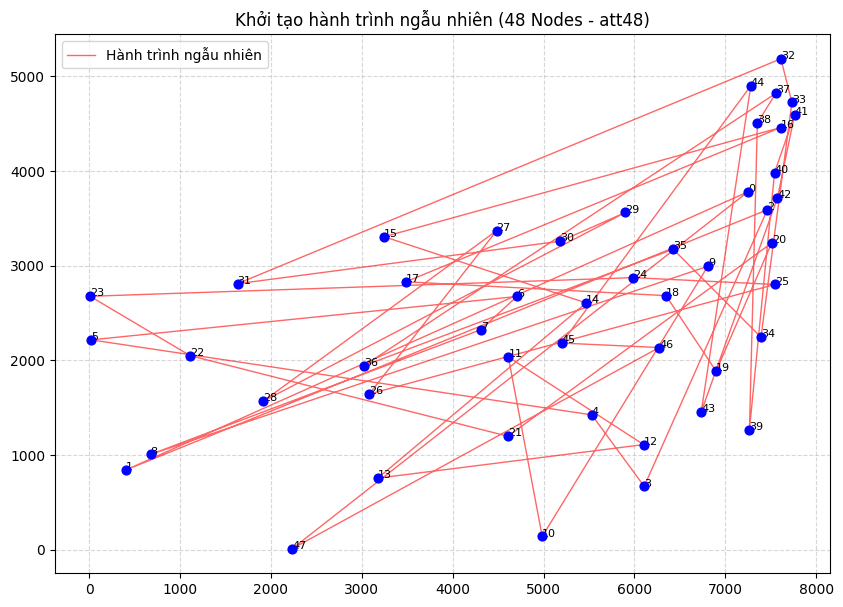

In [46]:
def plot_tour(coords, tour_indices):
    plt.figure(figsize=(10, 7))
    
    # Lấy tọa độ X và Y theo thứ tự của hành trình ngẫu nhiên
    ordered_coords = coords[tour_indices]
    
    # Vẽ các đường nối giữa các thành phố
    plt.plot(ordered_coords[:, 0], ordered_coords[:, 1], 'r-', alpha=0.6, linewidth=1, label='Hành trình ngẫu nhiên')
    
    # Vẽ các điểm thành phố
    plt.scatter(coords[:, 0], coords[:, 1], color='blue', s=40, zorder=5)
    
    # Đánh số thứ tự bốc thăm lên biểu đồ (tùy chọn)
    for i, idx in enumerate(tour_indices[:-1]):
        plt.annotate(f"{i}", (coords[idx, 0], coords[idx, 1]), fontsize=8)

    plt.title("Khởi tạo hành trình ngẫu nhiên (48 Nodes - att48)")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.show()

plot_tour(data, random_tour)

In [47]:

def create_population(size, nodes_count, coords_data):
    population = []
    for _ in range(size):
        tour=np.arange(nodes_count) # Tạo danh sách các chỉ số từ 0 đến nodes_count-1
        np.random.shuffle(tour) # Xáo trộn danh sách các chỉ số từ 0 đến nodes_count-1, tránh việc thuật toán bị hội tụ cục bộ quá sớm
        full_path = np.append(tour, tour[0]) # Thêm điểm đầu tiên vào cuối để hoàn thành hành trình( vòng tròn)
        dist = total_tour_distance(coords_data, full_path) 
        population.append({
            "path": full_path,
            "distance": dist
        })# Thêm cá thể vào quần thể
    return population

population_size = 100
num_nodes = data.shape[0]# Số lượng node trong dữ liệu(48)
my_population = create_population(population_size, num_nodes, data)
# In kết quả quãng đường của 100 phương án(test)
print(f"--- Quãng đường của {population_size} phương án khởi tạo ---")
for i, ind in enumerate(my_population):
    print(f"Phương án {i+1}: {ind['distance']:.2f}")

--- Quãng đường của 100 phương án khởi tạo ---
Phương án 1: 160641.09
Phương án 2: 146349.59
Phương án 3: 139229.95
Phương án 4: 171233.81
Phương án 5: 158061.20
Phương án 6: 151670.37
Phương án 7: 155563.71
Phương án 8: 167669.85
Phương án 9: 147380.55
Phương án 10: 163789.08
Phương án 11: 139947.34
Phương án 12: 146181.02
Phương án 13: 140804.99
Phương án 14: 156957.05
Phương án 15: 159719.18
Phương án 16: 147420.54
Phương án 17: 156899.17
Phương án 18: 161904.26
Phương án 19: 164675.27
Phương án 20: 166373.52
Phương án 21: 154456.88
Phương án 22: 167700.52
Phương án 23: 166241.38
Phương án 24: 168799.77
Phương án 25: 150496.63
Phương án 26: 153294.94
Phương án 27: 174218.18
Phương án 28: 167453.27
Phương án 29: 142036.03
Phương án 30: 174684.78
Phương án 31: 156933.13
Phương án 32: 153217.61
Phương án 33: 168618.21
Phương án 34: 163428.02
Phương án 35: 166185.97
Phương án 36: 154880.54
Phương án 37: 167338.17
Phương án 38: 159811.54
Phương án 39: 155673.34
Phương án 40: 152431.45
Ph

                                Evaluation      

In [48]:
def sort_population_and_select_best_half(my_population):
    sorted_population = sorted(my_population, key=lambda x: x['distance']) # tăng dần theo quãng đường(distance)
# 2. cắt 50%
    cut = len(sorted_population) // 2
# 3. Lấy 50% tốt nhất (0->nửa danh sách đã sắp xếp)
    best_50_percent = sorted_population[:cut]
    return sorted_population, best_50_percent
sorted_population, best_50_percent = sort_population_and_select_best_half(my_population)
print(f"Số lượng cá thể giữ lại: {len(best_50_percent)}")
print(f"Phương án tốt nhất có quãng đường: {sorted_population[0]['distance']:.2f}")
print("\nDanh sách quãng đường 50% tốt nhất:")
for ind in best_50_percent:
    print(f"{ind['path']}- {ind['distance']:.2f}")


Số lượng cá thể giữ lại: 50
Phương án tốt nhất có quãng đường: 135259.81

Danh sách quãng đường 50% tốt nhất:
[40 20  7 17 45 42 16 24 22 37 15 38 34 21 35 27  0 18 47 31 13 12 39 14
 36  9  5 29  4 25 33 44 23  3  6 30 26 32 10 43  8 28  1 19  2 11 41 46
 40]- 135259.81
[10 45  8 25 44 31 41 38  9 24 34 17  0  2 33  1 43 36 42 13 20 46 29 26
 21 18 14 28  5 16 27 47 19  4 35 11 39 12 23 40  7 30 22 37  3 15  6 32
 10]- 136533.43
[18 43 36 45  6 42 16  5  4 31 39 37 22  7 25 34 26  3 11 47 20  2 19 30
  0 17 35 46 40 33 10  8  1 13 14 41 44 21 28 24 32 12 38  9 29 23 15 27
 18]- 136907.63
[24 34 47 21 15 31  3 40  0 26 19 39 32 11 22  2 25 46  6  1 35 17  5 41
  9 28 13 10 20 14 12 29 27 23 30 37 36 16 38 45 44 43  7  8 33 18 42  4
 24]- 138426.08
[31 46 34 45 44  0 30 14 42 17 29 35 20  8  5  9 19 12 32 22 43  6 36 23
 33 10  2 41  3 25 11 26 21 15  1 38  4 39 40 47 28  7 37 13 27 16 24 18
 31]- 139229.95
[30 15  4 38 13 31  2 43 24  3 14 19 23 12 41 25  5 33 42  8 36  9 28 20
  1  0 

                                Crossover & Mutation &Selection 
                                

In [49]:
def cycle_crossover(parent1_path, parent2_path):
    # Lấy n phần tử đầu (bỏ điểm quay về cuối cùng)
    p1=parent1_path[:-1]
    p2=parent2_path[:-1]
    n = len(p1)
    # Khởi tạo 2 con với giá trị rỗng (-1)
    child1 = np.full(n, -1, dtype=int)
    child2 = np.full(n, -1, dtype=int)
    # đánh dấu các phần tử đã thăm
    visited = np.zeros(n, dtype=bool)
    cycle_id = 0
    """
    i->current=0
    cycle_indices = []
    cycle_indices.append(0)
    visited[0]=True
    current_value_in_p2 = p2[0]=9
    current=np.where(p1 == current_value_in_p2)[0][0]=8
    
    Cha 1 (P1): [1, 2, 3, 4, 5, 6, 7, 8, 9] 
    Cha 2 (P2): [9, 3, 7, 8, 2, 6, 5, 1, 4]
    [0, 8, 3, 7] tạo thành chu trình 1( cycle_id = 0)(1-9-8-4-1)
    child1 lấy từ P1, child2 lấy từ P2
    c1=[1, -1, -1, 4, -1, -1, -1, 8, 9]
    c2=[9, -1, -1, 8, -1, -1, -1, 1, 4]
    [1, 2, 6, 4] tạo thành chu trình 2( cycle_id = 1)(2-3-7-5-2)
    c1 lấy từ P2, c2 lấy từ P1
    c1=[1, 3, 7, 4, 2, -1, 5, 8, 9]
    c2=[9, 2, 3, 8, 5, -1, 7, 1, 4]
    """
    for i in range(n):
        if not visited[i]:
            # Tìm một chu trình mới
            cycle_indices = []
            current = i
            while current not in cycle_indices:
                cycle_indices.append(current)
                visited[current]=True
                # Tìm chỉ số của phần tử tương ứng trong cha kia
                current_value_in_p2 = p2[current]
                current=np.where(p1 == current_value_in_p2)[0][0]
            # Sao chép xen kẽ các chu trình vào con( child1 và child2 lấy từ p1 và p2, cycle_id chẵn thì lấy từ p1, lẻ thì lấy từ p2 và ngược lại)
            if cycle_id % 2 == 0:
                child1[cycle_indices] = p1[cycle_indices]
                child2[cycle_indices] = p2[cycle_indices]
            else:
                child1[cycle_indices] = p2[cycle_indices]
                child2[cycle_indices] = p1[cycle_indices]
            cycle_id += 1
            
    # Khép kín vòng lặp cho các con
    full_c1 = np.append(child1, child1[0])
    full_c2 = np.append(child2, child2[0])
    return full_c1, full_c2

In [50]:
def swap_mutation(path_indices, p_m=0.1):
    """Đột biến đổi chỗ 2 điểm """
    path = path_indices[:-1].copy() # Lấy n node (bỏ điểm quay về)
    
    if random.random() < p_m:
        # Chọn 2 vị trí bất kỳ và đổi chỗ
        idx1, idx2 = random.sample(range(len(path)), 2)
        path[idx1], path[idx2] = path[idx2], path[idx1]
        test = np.append(path, path[0])
        if(total_tour_distance(data, test) > total_tour_distance(data, path_indices)):  
            return path_indices
    return np.append(path, path[0]) # Khép kín vòng lặp

In [51]:
def selection_elitism(combined_population, n_size):
    """Chọn lọc Elitism: Giữ lại n cá thể tốt nhất """
    # Sắp xếp theo quãng đường tăng dần
    sorted_pop = sorted(combined_population, key=lambda x: x['distance'])
    # Trả về n_size cá thể đứng đầu(slicing)
    return sorted_pop[:n_size]

In [52]:
def breed_population(parent_pop, coords_data, p_c=0.7):
    offspring_pop = []
    # Xáo trộn danh sách cha mẹ để chọn cặp ngẫu nhiên
    random.shuffle(parent_pop)
    # Chia cặp (ví dụ: cá thể 0 lai với 1, 2 lai với 3...)
    # chia ra do ton bo nho
    for i in range(0, len(parent_pop) - 1, 2):
        parent1 = parent_pop[i]
        parent2 = parent_pop[i+1]
        if random.random() < p_c:
            # Thực hiện lai ghép nếu xác suất nhỏ hơn p_c
            c1_path, c2_path = cycle_crossover(parent1['path'], parent2['path'])
            # Tính quãng đường và thêm vào danh sách con
            offspring_pop.append({"path": c1_path, "distance": total_tour_distance(coords_data, c1_path)})
            offspring_pop.append({"path": c2_path, "distance": total_tour_distance(coords_data, c2_path)})
        else:
            # Nếu không lai, giữ nguyên cha mẹ làm con (hoặc tạo bản sao)
            offspring_pop.append(parent1.copy())
            offspring_pop.append(parent2.copy())
    return offspring_pop


In [56]:
N = 500          # Kích thước quần thể
generations = 500  # Số thế hệ
p_c = 0.9      # Xác suất lai ghép
p_m = 0.1   # Xác suất đột biến
"""
Lai ghép tạo đời con (offspring)
Đột biến và Đánh giá lại (ind)
Đấu tranh sinh tồn (Selection)
"""
#  Khởi tạo quần thể ban đầu (P0) 
current_pop = sort_population_and_select_best_half(create_population(N*5, num_nodes, data))[1] # best_50_percent lấy quần thể tốt nhất(theo distance)
history_best = []
history_best_path=[]
print("Bắt đầu tiến hóa...")

for gen in range(generations):
    # Lai ghép tạo quần thể con(offspring)
    offspring = breed_population(current_pop, data, p_c)
     
    #  Đột biến các cá thể con và Đánh giá lại (ind)
    for ind in offspring:
        ind['path'] = swap_mutation(ind['path'], p_m)
        ind['distance'] = total_tour_distance(data, ind['path'])
        
    # Chọn lọc sinh tồn 
    # Gộp cha mẹ và con lại rồi chọn N cái tốt nhất
    combined = current_pop + offspring
    current_pop = selection_elitism(combined, N)
    
    # Lưu lại kết quả tốt nhất thế hệ này để theo dõi
    best_dist = current_pop[0]['distance']# Quãng đường tốt nhất hiện tại(float)
    history_best.append(best_dist)
    best_path = current_pop[0]['path'] # Lộ trình tốt nhất hiện tại(array)
    history_best_path.append(best_path)
    if (gen + 1) % 10 == 0:
        print(f"Thế hệ {gen+1}: Quãng đường ngắn nhất = {best_dist:.2f}")

print(f"Quãng đường đã giảm từ {history_best[0]:.2f} xuống còn {history_best[-1]:.2f}")

Bắt đầu tiến hóa...
Thế hệ 10: Quãng đường ngắn nhất = 104907.35
Thế hệ 20: Quãng đường ngắn nhất = 90611.34
Thế hệ 30: Quãng đường ngắn nhất = 81516.56
Thế hệ 40: Quãng đường ngắn nhất = 73073.35
Thế hệ 50: Quãng đường ngắn nhất = 68965.35
Thế hệ 60: Quãng đường ngắn nhất = 63141.35
Thế hệ 70: Quãng đường ngắn nhất = 59742.09
Thế hệ 80: Quãng đường ngắn nhất = 57705.14
Thế hệ 90: Quãng đường ngắn nhất = 54572.75
Thế hệ 100: Quãng đường ngắn nhất = 52993.22
Thế hệ 110: Quãng đường ngắn nhất = 51233.37
Thế hệ 120: Quãng đường ngắn nhất = 49304.44
Thế hệ 130: Quãng đường ngắn nhất = 48503.18
Thế hệ 140: Quãng đường ngắn nhất = 47728.08
Thế hệ 150: Quãng đường ngắn nhất = 47403.67
Thế hệ 160: Quãng đường ngắn nhất = 46917.77
Thế hệ 170: Quãng đường ngắn nhất = 46607.11
Thế hệ 180: Quãng đường ngắn nhất = 44976.19
Thế hệ 190: Quãng đường ngắn nhất = 43984.63
Thế hệ 200: Quãng đường ngắn nhất = 43707.82
Thế hệ 210: Quãng đường ngắn nhất = 43182.31
Thế hệ 220: Quãng đường ngắn nhất = 42865.6

In [57]:
print({history_best[-1]})
print(history_best_path[-1])

{42217.0192002603}
[40 33 28  1 25  3 34 44 23 31 38  9 41  4 47 24 13 22 10 12 20 46 11 14
 32 19 29 42 16 26 27  6 17 43 30 37  8  0 21  2 39 45 35  5 18 36  7 15
 40]


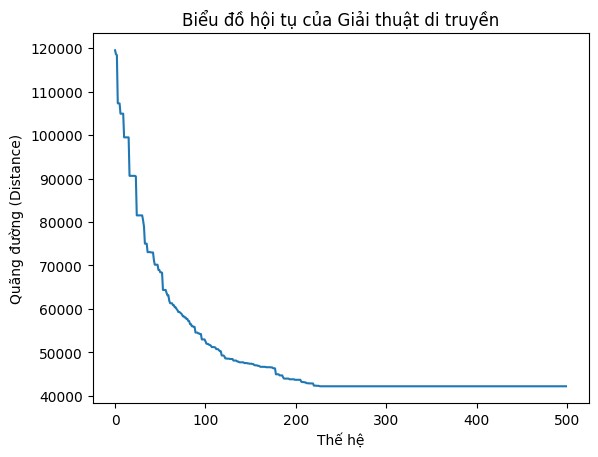

In [58]:
import matplotlib.pyplot as plt

plt.plot(history_best)
plt.title("Biểu đồ hội tụ của Giải thuật di truyền")
plt.xlabel("Thế hệ")
plt.ylabel("Quãng đường (Distance)")
plt.show()